In [1]:
import csv
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_files
from sklearn import preprocessing
from sklearn.cluster import KMeans,DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn import metrics



In [2]:
from yellowbrick.cluster import KElbowVisualizer
from pyclustering.cluster.cure import cure
from pyclustering.cluster import cluster_visualizer
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
from pyclustering.utils import timedcall

c:\users\nethr\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import pandas as pd
df = pd.read_csv('Online_Retail_Data_Set.csv',
                encoding="ISO-8859-1",
                dtype={'CustomerID': str,'InvoiceID': str})

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [4]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France


In [6]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [7]:
import pandas_profiling as pp
pp.ProfileReport(df)

In [8]:
# Remove the negative values and replace with nan

df[df['Quantity'] < 0]=np.nan
df[df['UnitPrice'] < 0]=np.nan
df.describe()

,Quantity,UnitPrice
count,531283.000000,531283.000000
mean,10.655299,3.898954
std,156.830617,35.876279
min,1.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


In [9]:
# Get the total spent for each  line item
df['total_dollars'] = df['Quantity']*df['UnitPrice']
df.describe()

,Quantity,UnitPrice,total_dollars
count,531283.000000,531283.000000,531283.000000
mean,10.655299,3.898954,20.077218
std,156.830617,35.876279,270.058254
min,1.000000,0.000000,0.000000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.080000,9.900000
75%,10.000000,4.130000,17.700000
max,80995.000000,13541.330000,168469.600000


### Building a customer table

Lets aggregate transaction data to learn more about our customers.

In [10]:
# How many orders have they made

invoice_ct = df.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
invoice_ct.columns = ['CustomerID', 'NumberOrders']
invoice_ct.describe()

,NumberOrders
count,4339.000000
mean,91.708689
std,228.792852
min,1.000000
25%,17.000000
50%,41.000000
75%,100.000000
max,7847.000000


In [11]:
# How much money they have spent

total_spend = df.groupby(by="CustomerID", as_index=False)['total_dollars'].sum()
total_spend.columns = ['CustomerID', 'total_spent']
total_spend.describe()

,total_spent
count,4339.000000
mean,2053.793018
std,8988.248381
min,0.000000
25%,307.245000
50%,674.450000
75%,1661.640000
max,280206.020000


In [12]:
# How many items they bought
total_items = df.groupby(by="CustomerID", as_index=False)['Quantity'].sum()
total_items.columns = ['CustomerID', 'NumberItems']
total_items.describe()

,NumberItems
count,4339.000000
mean,1194.214335
std,5055.603049
min,1.000000
25%,160.000000
50%,379.000000
75%,993.000000
max,197491.000000


In [13]:
# When was their first order and how long ago was that from the last date in file (presumably)
# when the data were pulled

earliest_order = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].min()
earliest_order.columns = ['CustomerID', 'EarliestInvoice']
earliest_order['now'] = pd.to_datetime((df['InvoiceDate']).max())

earliest_order['days_as_customer'] = 1 + (earliest_order.now-earliest_order.EarliestInvoice).astype('timedelta64[D]')
earliest_order.drop('now', axis=1, inplace=True)
earliest_order

,CustomerID,EarliestInvoice,days_as_customer
0,12346,2011-01-18 10:01:00,326.0
1,12347,2010-12-07 14:57:00,367.0
2,12348,2010-12-16 19:09:00,358.0
3,12349,2011-11-21 09:51:00,19.0
4,12350,2011-02-02 16:01:00,310.0
...,...,...,...
4334,18280,2011-03-07 09:52:00,278.0
4335,18281,2011-06-12 10:53:00,181.0
4336,18282,2011-08-05 13:35:00,126.0
4337,18283,2011-01-06 14:14:00,337.0


In [14]:
# When  was their last order and  how long agowas that from  the last date in file (presumably
# When the data were pulled)

last_order = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
last_order.columns = ['CustomerID', 'last_purchase']
last_order['now'] = pd.to_datetime((df['InvoiceDate']).max())
last_order['days_since_purchase'] = 1 + (last_order.now-last_order.last_purchase).astype('timedelta64[D]')
last_order.drop('now', axis=1, inplace=True)
last_order.head()

,CustomerID,last_purchase,days_since_purchase
0,12346,2011-01-18 10:01:00,326.0
1,12347,2011-12-07 15:52:00,2.0
2,12348,2011-09-25 13:13:00,75.0
3,12349,2011-11-21 09:51:00,19.0
4,12350,2011-02-02 16:01:00,310.0


In [15]:
# Combine all the dataframes into one
# Customer segmentaation

import functools
dfs = [total_spend,invoice_ct,earliest_order,last_order,total_items]
CustomerTable = functools.reduce(lambda left,right: pd.merge(left,right,on="CustomerID", how='outer'), dfs)
CustomerTable.head()

,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems
0,12346,77183.60,1,2011-01-18 10:01:00,326.0,2011-01-18 10:01:00,326.0,74215.0
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458.0
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341.0
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631.0
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197.0


In [16]:
# How manu customers?
len(CustomerTable)

4339

In [17]:
CustomerTable.describe()

,total_spent,NumberOrders,days_as_customer,days_since_purchase,NumberItems
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,2053.793018,91.708689,223.259968,92.518322,1194.214335
std,8988.248381,228.792852,117.915703,100.009747,5055.603049
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,307.245000,17.000000,113.000000,18.000000,160.000000
50%,674.450000,41.000000,249.000000,51.000000,379.000000
75%,1661.640000,100.000000,327.000000,142.000000,993.000000
max,280206.020000,7847.000000,374.000000,374.000000,197491.000000


In [18]:
# Identify and separate big spenders

def big_spender(row):
    if row['total_spent'] >= 1661.64:
        return 'Yes'
    else:
        return 'No'
    
def many_orders(row):
    if row['NumberOrders'] >= 100:
        return 'Yes'
    else:
        return 'No'
    
def loyal_customer(row):
    if row['days_as_customer'] >= 326:
        return 'Yes'
    else:
        return 'No'
    
def dormant_customer(row):
    if row['days_since_purchase'] >= 141:
        return 'Yes'
    else:
        return 'No'
    
CustomerTable['BigSpender'] = CustomerTable.apply(big_spender, axis=1)
CustomerTable['ManyOrders'] = CustomerTable.apply(many_orders, axis=1)
CustomerTable['LoyalCustomer'] = CustomerTable.apply(loyal_customer, axis=1)
CustomerTable['DormanCustomer'] = CustomerTable.apply(dormant_customer, axis=1)

CustomerTable['OrderFrequency'] = CustomerTable['NumberOrders']/CustomerTable['days_as_customer']

CustomerTable.head(10)



,CustomerID,total_spent,NumberOrders,EarliestInvoice,days_as_customer,last_purchase,days_since_purchase,NumberItems,BigSpender,ManyOrders,LoyalCustomer,DormanCustomer,OrderFrequency
0,12346,77183.60,1,2011-01-18 10:01:00,326.0,2011-01-18 10:01:00,326.0,74215.0,Yes,No,Yes,Yes,0.003067
1,12347,4310.00,182,2010-12-07 14:57:00,367.0,2011-12-07 15:52:00,2.0,2458.0,Yes,Yes,Yes,No,0.495913
2,12348,1797.24,31,2010-12-16 19:09:00,358.0,2011-09-25 13:13:00,75.0,2341.0,Yes,No,Yes,No,0.086592
3,12349,1757.55,73,2011-11-21 09:51:00,19.0,2011-11-21 09:51:00,19.0,631.0,Yes,No,No,No,3.842105
4,12350,334.40,17,2011-02-02 16:01:00,310.0,2011-02-02 16:01:00,310.0,197.0,No,No,No,Yes,0.054839
5,12352,2506.04,85,2011-02-16 12:33:00,297.0,2011-11-03 14:37:00,36.0,536.0,Yes,No,No,No,0.286195
6,12353,89.00,4,2011-05-19 17:47:00,204.0,2011-05-19 17:47:00,204.0,20.0,No,No,No,Yes,0.019608
7,12354,1079.40,58,2011-04-21 13:11:00,232.0,2011-04-21 13:11:00,232.0,530.0,No,No,No,Yes,0.250000
8,12355,459.40,13,2011-05-09 13:49:00,214.0,2011-05-09 13:49:00,214.0,240.0,No,No,No,Yes,0.060748
9,12356,2811.43,59,2011-01-18 09:50:00,326.0,2011-11-17 08:40:00,23.0,1591.0,Yes,No,Yes,No,0.180982


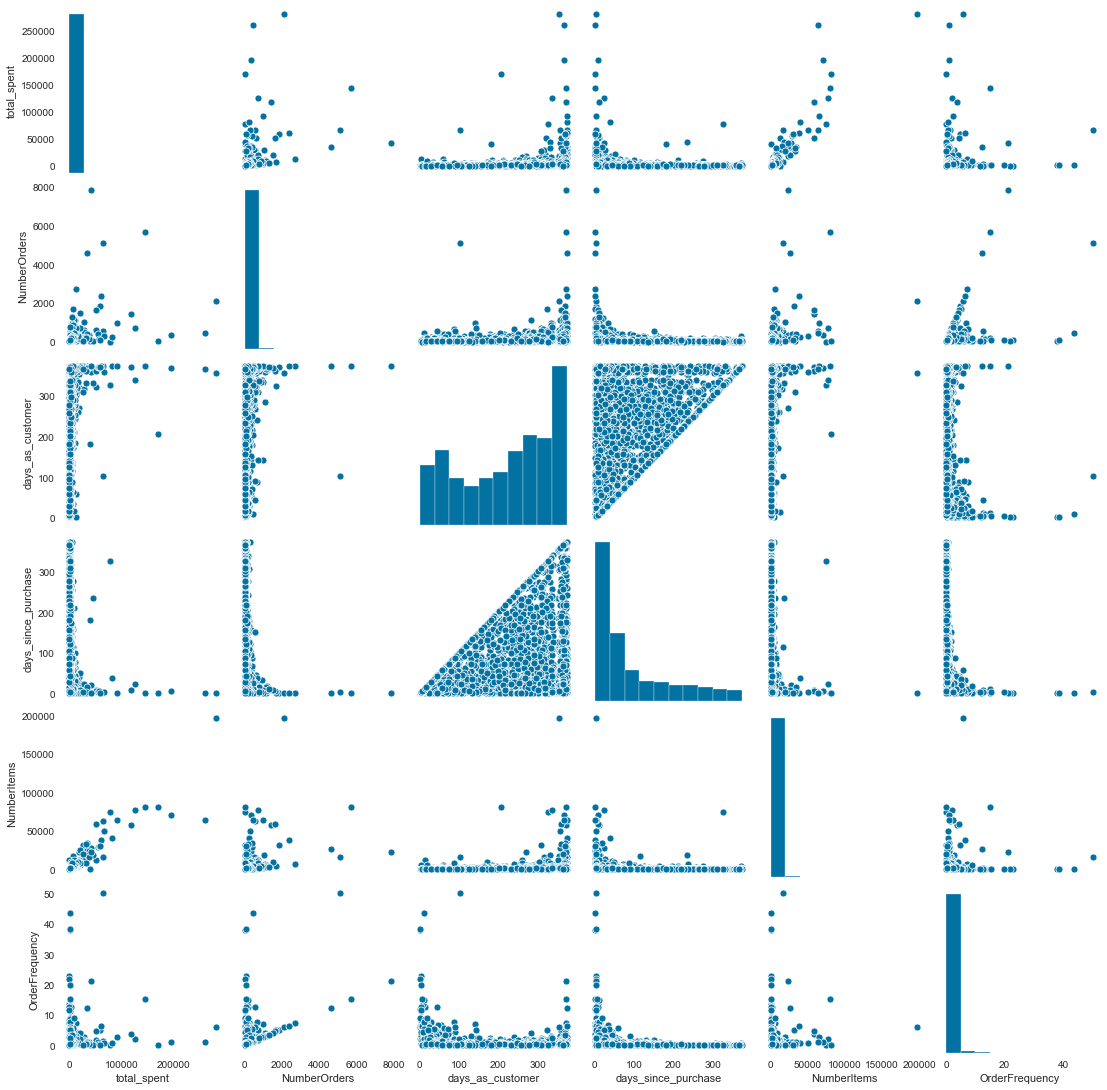

In [19]:
# Look at the distributions and relationships with other continous variables

import seaborn as sns
sns.pairplot(CustomerTable, vars=['total_spent', "NumberOrders", 'days_as_customer',
                                 'days_since_purchase', 'NumberItems', 'OrderFrequency'])


## Customer - Segmentation

In [26]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [27]:

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

In [28]:

df=pd.read_csv('Online_Retail_Data_Set.csv',encoding = 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [29]:
df.shape


(541909, 8)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [31]:
df.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [32]:
df=df.drop(df[df['CustomerID'].isna()==True].index,axis=0)


In [33]:
df.shape


(406829, 8)

In [34]:
df.isna().sum()  #rechecking missing values


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Data Analysis

In [35]:

df['Country'].value_counts()
# Maximum orders are coming from UK

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [36]:
print(df['Country'].unique())
print('Total no. of countries from where customers belong: ',df['Country'].nunique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']
Total no. of countries from where customers belong:  37


In [37]:
print('Total no. of customers: ',df['CustomerID'].nunique())
print('Total transactions done: ',df['InvoiceNo'].nunique())
print('Products sold are : ',df['StockCode'].nunique())

Total no. of customers:  4372
Total transactions done:  22190
Products sold are :  3684


In [38]:

# Need to check the cancelled orders as well as they are of not use for customer segmentation,
#'C'mentioned before the Invoiceno indicates that the order is cancelled
df[df['InvoiceNo'].apply(lambda x: x[0]=='C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [39]:
percent_transaction_cancelled = round((df[df['InvoiceNo'].apply(lambda x: x[0]=='C')]['InvoiceNo'].nunique()/ df['InvoiceNo'].nunique())*100,2)
print('Percentage of Transactions cancelled are : ',percent_transaction_cancelled)

Percentage of Transactions cancelled are :  16.47


In [40]:

df=df.drop(df[df['InvoiceNo'].apply(lambda x: x[0]=='C')].index,axis=0)
df.shape

(397924, 8)

In [41]:
df['Amount'] = df['Quantity'] * df['UnitPrice']


In [42]:

a=df.groupby('CustomerID').sum()['Amount']
a= a.reset_index()

In [43]:
a.head()


,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [44]:
b= df.groupby('CustomerID')['InvoiceNo'].count()
b= b.reset_index()
b.columns = ['CustomerID', 'Frequency']

In [45]:
b.head()


,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [46]:
df1= pd.merge(a, b, on='CustomerID', how='inner')
df1.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [47]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date = df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [48]:
df['days_diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,days_diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [49]:
c = df.groupby('CustomerID')['days_diff'].min()
c = c.reset_index()
c.head()

,CustomerID,days_diff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [50]:
c['days_diff'] = c['days_diff'].dt.days
c.head()

,CustomerID,days_diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [51]:
df1 = pd.merge(df1, c, on='CustomerID', how='inner')
df1.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
df1.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [52]:
df2=df1[['Amount','Frequency','Recency']]   # using only Amount, Frequency and Recency to find the customer segments.


In [53]:
df1_scaled = df2.apply(zscore)    # scaling of data is required as all the calculations is based on distance
df1_scaled.head()


,Amount,Frequency,Recency
0,8.359634,-0.396512,2.334858
1,0.251046,0.394688,-0.905199
2,-0.028546,-0.265374,-0.175186
3,-0.032963,-0.081781,-0.735196
4,-0.191315,-0.326572,2.174855


## K-Means Clustering

In [54]:
kmeans = KMeans(random_state=2)
kmeans.fit(df1_scaled)

KMeans(random_state=2)

In [55]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 10 )
    clusters.fit(df1_scaled)
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,13017.000000
1,2,8996.812576
2,3,5452.648368
3,4,4000.174252
4,5,2957.935553
5,6,2371.044601
6,7,1923.288311
7,8,1674.443015
8,9,1478.979772
9,10,1319.298967


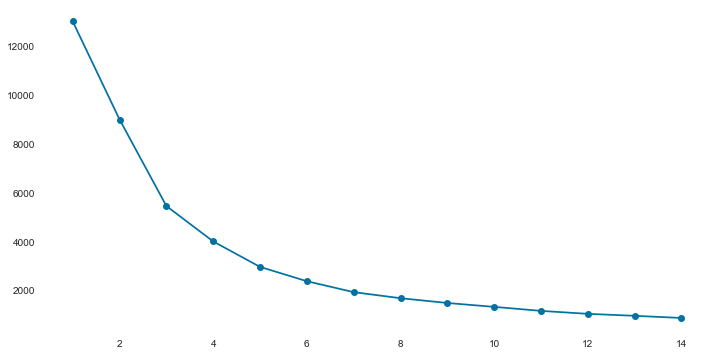

In [56]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )


In [57]:

kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(df1_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df1_scaled) )
centroid_df

,Amount,Frequency,Recency
0,-0.002798,0.049747,-0.511812
1,-0.157614,-0.279402,1.546944
2,13.804560,10.815795,-0.878276


In [58]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

In [59]:
df_kmeans = df1.join(df_labels)
df_kmeans.head()

,CustomerID,Amount,Frequency,Recency,labels
0,12346.0,77183.60,1,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


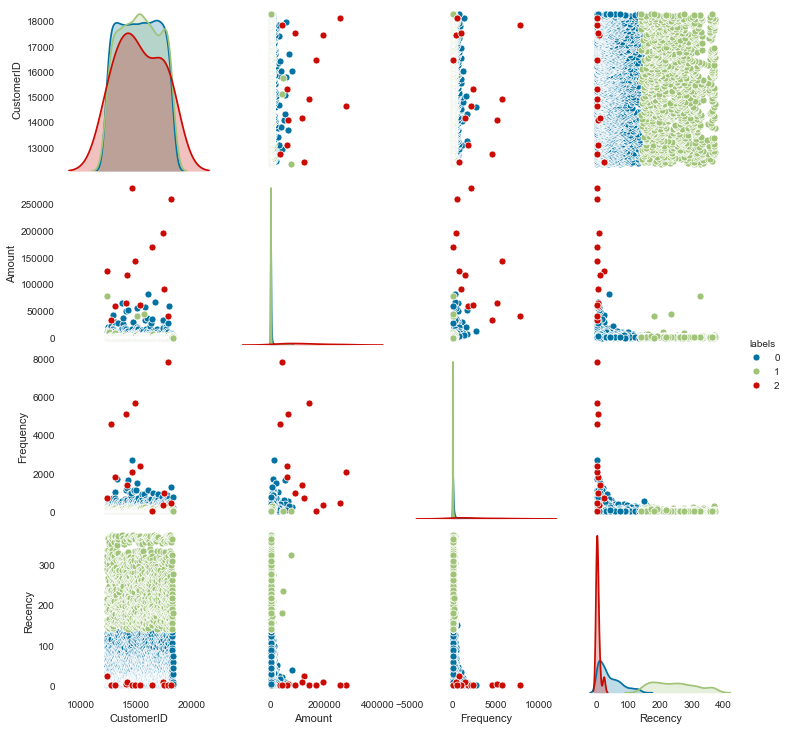

In [60]:
sns.pairplot(df_kmeans,diag_kind='kde',hue='labels')


## Hierarchical Clustering

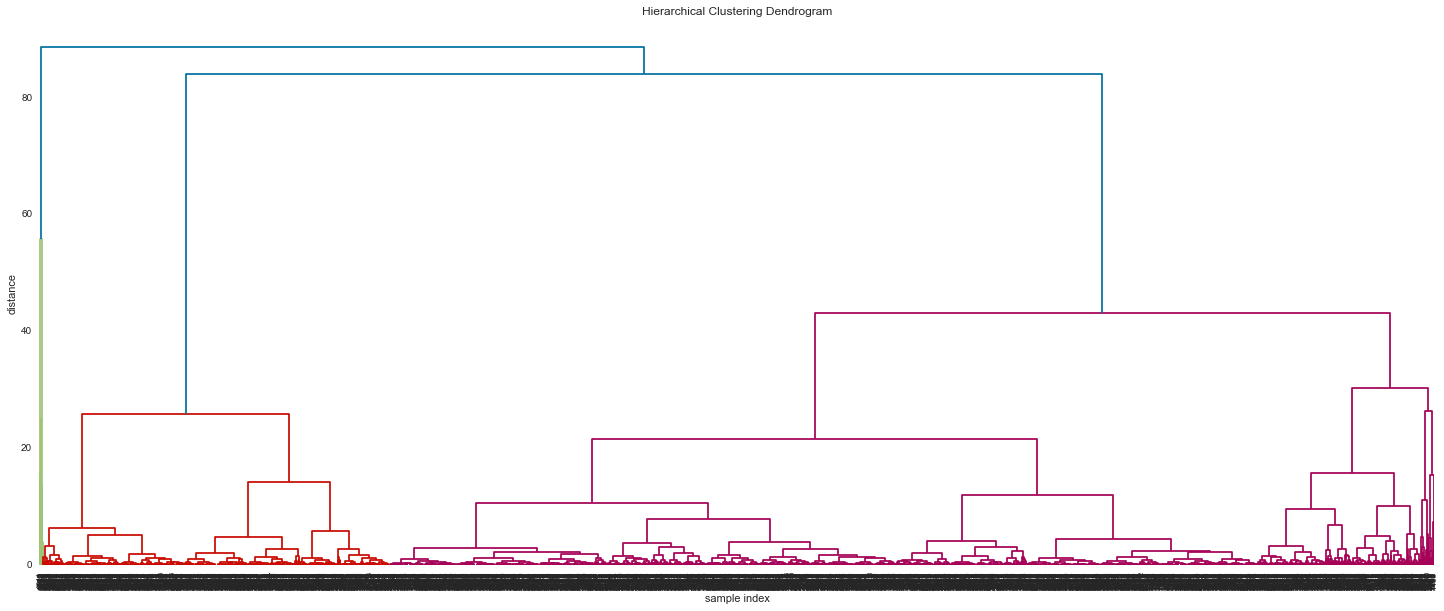

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
Z = linkage(df1_scaled, method='ward',metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

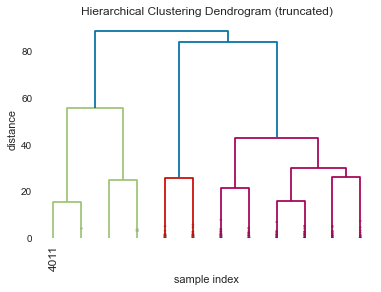

In [62]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [63]:
hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hie_clus.fit_predict(df1_scaled)

df_h = df1.copy(deep=True)
df_h['label'] = labels
df_h['label']=df_h['label'].astype('category')
df_h.head()

,CustomerID,Amount,Frequency,Recency,label
0,12346.0,77183.60,1,325,1
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


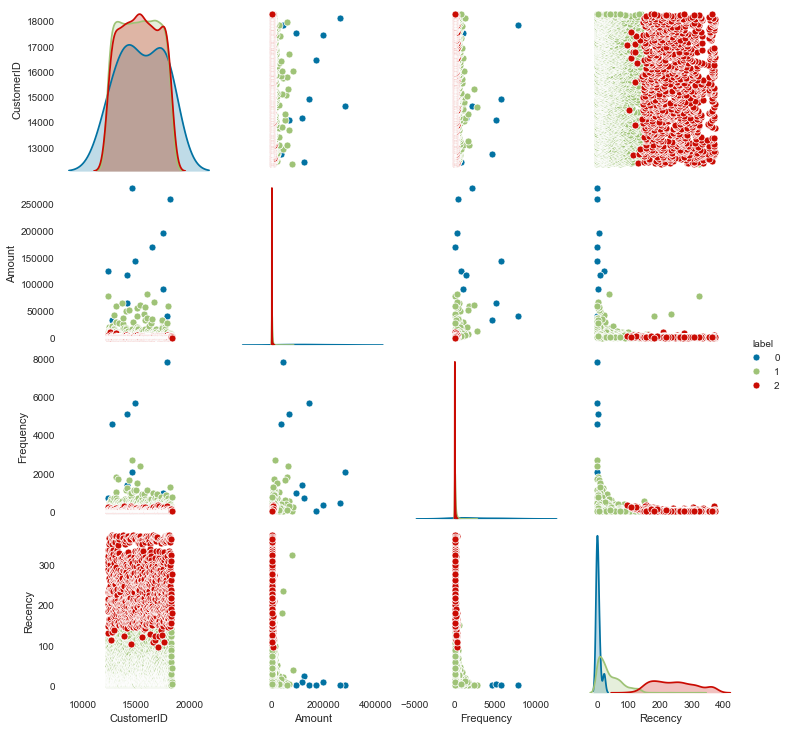

In [64]:
sns.pairplot(df_h,diag_kind='kde',hue='label')


## Inferences


From the centroids of Kmeans clustering:

1. Customers belonging to cluster 0 are the ones who recently visited but have moderate frequency to visit the webpage and purchase products of moderate amount.
2. Customers belonging to cluster 1 are the ones who haven't visited the webpage recently, frequency is the lowest with least transaction amount.
3. Customers belonging to cluster 2 are the ones seems to be loyal customers as they are frequently visiting the webpage with the huge transaction amount.

From Hierarchical clustering:

1. Customers belonging to cluster 0 are loyal customers which are same as Kmeans cluster 2.
2. Customers belonging to cluster 1 are the potential customers sam as Kmeans cluster 0.
3. Customers belonging to cluster 2 are same as Kmeans cluster 1.

Thus focus must be more on retaining the customers belonging to cluster 2 (kmeans) and cluster 0 (hierarchical) providing better services and discounts. Also customers belonging to cluster 0 (kmeans) and cluster 1 (hierarchical) are the potential customers who can convert into loyal cutsomers.For the same, a survey form could be send to those customers to understand their needs and preferences that can be work upon.

### Loading Data & Packages

In [65]:
# K-Means, CURE, DBSCAN

import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans,DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn import metrics



from yellowbrick.cluster import KElbowVisualizer
from pyclustering.cluster.cure import cure
from pyclustering.cluster import cluster_visualizer
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
from pyclustering.utils import timedcall

%matplotlib inline

## Data Analysis & Preproccessing

In [66]:
df = pd.read_csv('Online_Retail_Data_Set.csv',
                 encoding="ISO-8859-1",
                 dtype={'CustomerID': str,'InvoiceID': str})

###  Exploring Dataset

In [67]:
df.describe()


,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## Outliers

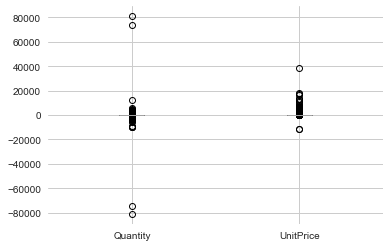

In [68]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot()

### Removing Null Values & filter Data on Quantity to be Positive

In [71]:
df=df.dropna().reset_index()
df = df[df.Quantity <=10000]
df = df[df.Quantity >=0]
df=df.sort_values(['Quantity'],ascending=False)
df.shape

(397921, 10)

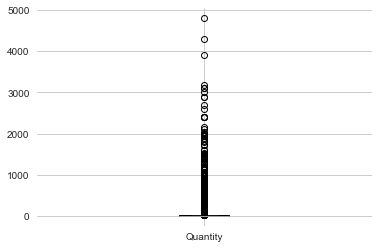

In [72]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot('Quantity')

### Countries Contribution at Dataset

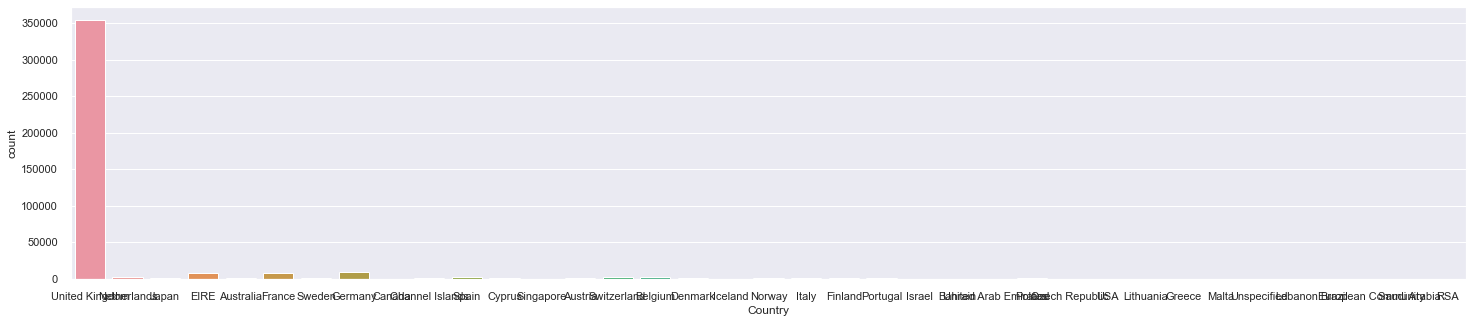

In [73]:

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Country", data=df)

### Selecting only UK due to sample size

In [75]:
dfuk=df[df['Country']=='United Kingdom']


### Creating the metrics per Customers due to create the customer Segmentation

We are going to run the project based on how much times does the customer bought, average price of the items that he buys and quantity per buy.

In [76]:
dfukg = (dfuk.groupby(['CustomerID','Country'],as_index=False)
          .agg({'InvoiceNo':'nunique', 'StockCode':'nunique','UnitPrice':'mean','Quantity':'sum'}))
dfukg
dfukg.reset_index()
dfukg['avgitems']=dfukg['Quantity']/dfukg['InvoiceNo']
db=dfukg[['InvoiceNo','UnitPrice','avgitems']]

### Mark and Removing the outliers

In [77]:
import numpy as np

i=0 
while i<=len(db)-1:
    quartile_1, quartile_3 = np.percentile(db['avgitems'], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr *1.5 )
    upper_bound = quartile_3 + (iqr *1.5)
    
    if db.loc[i,'avgitems']> upper_bound:
        db.loc[i,'outlier']=1
    elif db.loc[i,'avgitems']< lower_bound:
        db.loc[i,'outlier']=1
    else:
        db.loc[i,'outlier']=0
    i=i+1
    
db

c:\users\nethr\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\nethr\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,InvoiceNo,UnitPrice,avgitems,outlier
0,11,4.367864,115.909091,0.0
1,210,2.655701,122.609524,0.0
2,5,4.999950,294.200000,0.0
3,4,1.904746,180.500000,0.0
4,1,2.498333,70.000000,0.0
...,...,...,...,...
3914,1,4.765000,45.000000,0.0
3915,1,5.622857,54.000000,0.0
3916,2,5.199167,51.500000,0.0
3917,16,1.614987,87.312500,0.0


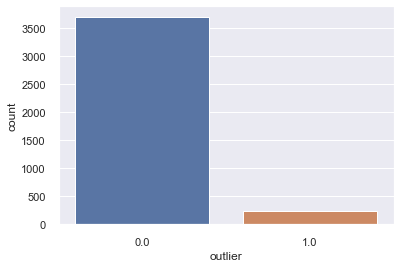

In [78]:
ax = sns.countplot(x="outlier", data=db)

In [79]:
db=db[db['outlier']==0]
db= db.drop(columns=['outlier'])
db

,InvoiceNo,UnitPrice,avgitems
0,11,4.367864,115.909091
1,210,2.655701,122.609524
2,5,4.999950,294.200000
3,4,1.904746,180.500000
4,1,2.498333,70.000000
...,...,...,...
3913,1,3.283333,66.000000
3914,1,4.765000,45.000000
3915,1,5.622857,54.000000
3916,2,5.199167,51.500000


### K-Means with not normalized data

#### Elbow Method

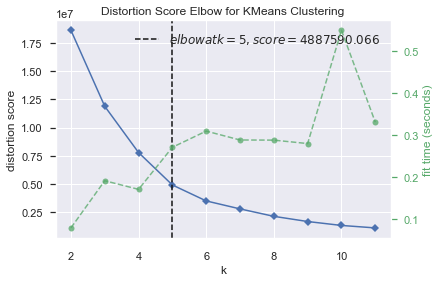

In [81]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(db)  
visualizer.show()

### Kmeans

[[3.34379671e+00 5.68121161e+00 6.77704089e+01]
 [4.86845466e+00 2.68143135e+00 2.66855538e+02]
 [4.47550432e+00 2.70635427e+00 4.03246111e+02]
 [1.00000000e+00 2.03310000e+03 1.00000000e+00]
 [4.47192840e+00 3.05328589e+00 1.57717765e+02]]
[4 4 1 ... 0 0 0]


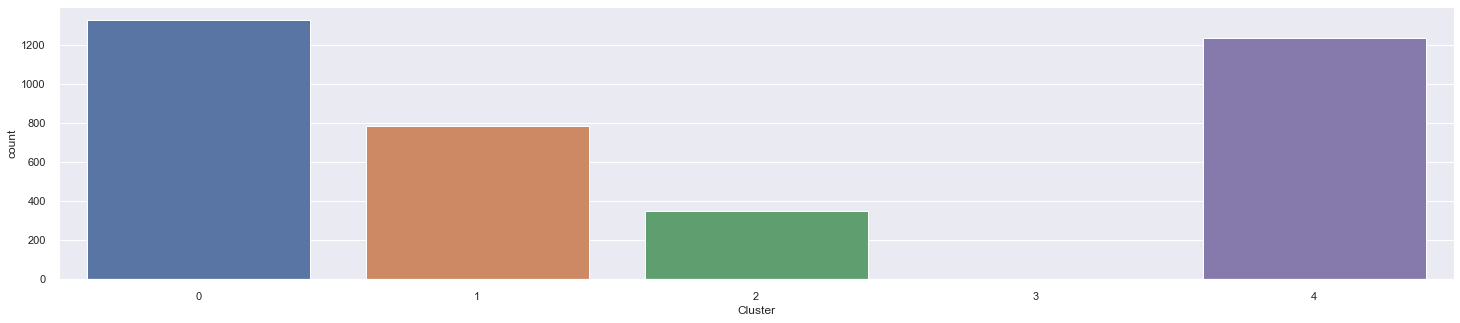

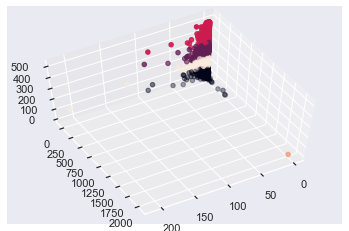

In [82]:

kmeans = KMeans(5)
kmeans.fit(db)
identified_clusters = kmeans.fit_predict(db)
data_with_clusters = db.copy()
data_with_clusters['Cluster'] = identified_clusters
print(kmeans.cluster_centers_)
print(identified_clusters)

sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=data_with_clusters)
data_with_clusters.groupby(['Cluster']).count()
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=data_with_clusters['InvoiceNo']
yline=data_with_clusters['avgitems']
zline=data_with_clusters['UnitPrice']

ax.scatter3D(xline, zline,yline,c=data_with_clusters['Cluster'])
ax.view_init(60, 60)

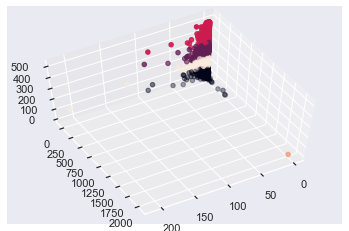

In [83]:

fig = plt.figure()
ax = plt.axes(projection='3d')
xline=data_with_clusters['InvoiceNo']
yline=data_with_clusters['avgitems']
zline=data_with_clusters['UnitPrice']

ax.scatter3D(xline, zline,yline,c=data_with_clusters['Cluster'])
ax.view_init(60, 60)

In [84]:
data_with_clusters[data_with_clusters['Cluster']==4]


,InvoiceNo,UnitPrice,avgitems,Cluster
0,11,4.367864,115.909091,4
1,210,2.655701,122.609524,4
3,4,1.904746,180.500000,4
8,7,1.927692,151.142857,4
11,2,10.368182,188.000000,4
...,...,...,...,...
3896,2,3.129082,119.500000,4
3898,8,3.403644,130.125000,4
3902,1,1.123077,182.000000,4
3904,2,5.246522,155.500000,4


In [85]:
kmeans.cluster_centers_


array([[3.34379671e+00, 5.68121161e+00, 6.77704089e+01],
       [4.86845466e+00, 2.68143135e+00, 2.66855538e+02],
       [4.47550432e+00, 2.70635427e+00, 4.03246111e+02],
       [1.00000000e+00, 2.03310000e+03, 1.00000000e+00],
       [4.47192840e+00, 3.05328589e+00, 1.57717765e+02]])

### K-Means with normalized data

### Scale Data

In [86]:
scaler = StandardScaler()
x_scaled=scaler.fit(db)
x_scaled = scaler.fit_transform(db)
x_scaled

array([[ 9.85610419e-01, -2.03503047e-03, -5.05487418e-01],
       [ 2.96065827e+01, -4.91715951e-02, -4.44316536e-01],
       [ 1.22666532e-01,  1.53665481e-02,  1.12220025e+00],
       ...,
       [-4.52629392e-01,  3.25154449e-02, -1.07067980e+00],
       [-3.08805411e-01,  2.08510718e-02, -1.09350328e+00],
       [ 1.70473033e+00, -7.78228751e-02, -7.66556918e-01]])

### Elbow

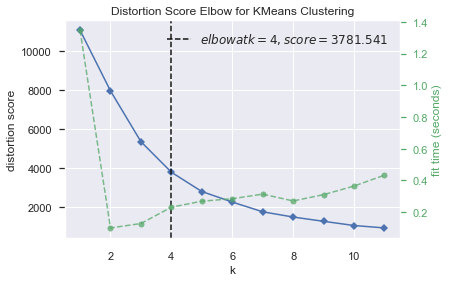

In [87]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()

### Kmeans

[4 4 1 ... 0 0 0]
[[3.34379671e+00 5.68121161e+00 6.77704089e+01]
 [4.86845466e+00 2.68143135e+00 2.66855538e+02]
 [4.47550432e+00 2.70635427e+00 4.03246111e+02]
 [1.00000000e+00 2.03310000e+03 1.00000000e+00]
 [4.47192840e+00 3.05328589e+00 1.57717765e+02]]


,InvoiceNo,UnitPrice,avgitems
cluster_pred,,,
0,1201,1201,1201
1,2487,2487,2487
2,1,1,1
3,9,9,9


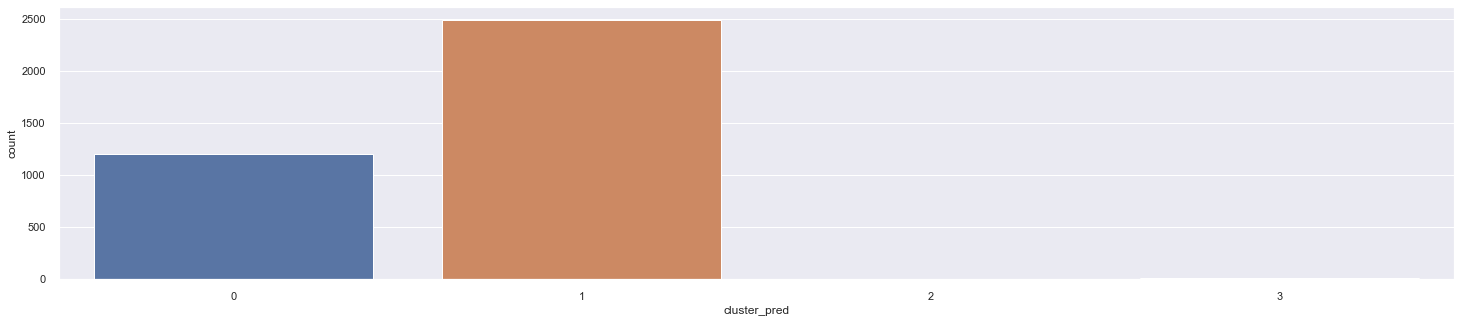

In [88]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)
clusters_scaled = db.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)
print(identified_clusters)
sns.set(style="darkgrid")
print(kmeans.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

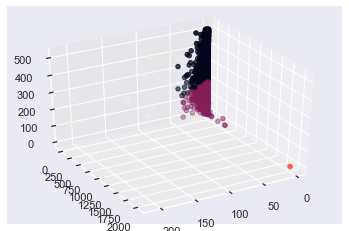

In [89]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=clusters_scaled['InvoiceNo']
yline=clusters_scaled['avgitems']
zline=clusters_scaled['UnitPrice']

ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(35, 60)

### DBSCAN with Normalized Data

,InvoiceNo,UnitPrice,avgitems
cluster_pred,,,
-1,44,44,44
0,3649,3649,3649
1,5,5,5


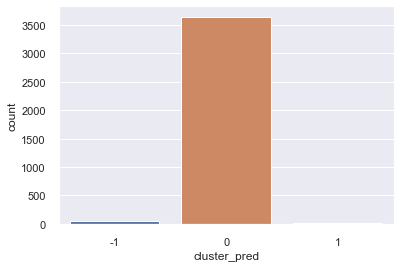

In [90]:
stscaler = StandardScaler().fit(db)
db11 = stscaler.transform(db)
dbsc = DBSCAN(eps = .5, min_samples = 5).fit(db11)
clusters_scaled = db.copy()
clusters_scaled['cluster_pred']=dbsc.fit_predict(db11)
clusters_scaled
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

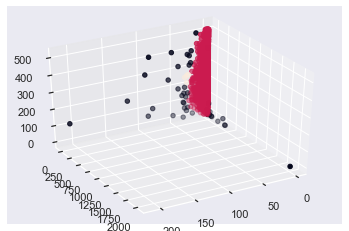

In [91]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=clusters_scaled['InvoiceNo']
yline=clusters_scaled['avgitems']
zline=clusters_scaled['UnitPrice']

ax.scatter3D(xline, zline,yline,c=clusters_scaled['cluster_pred'])
ax.view_init(35, 60)

### DBSCAN

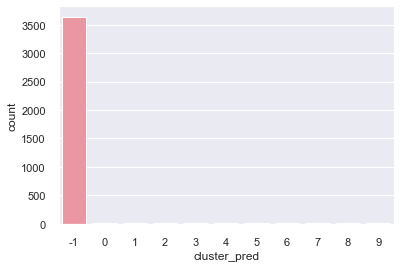

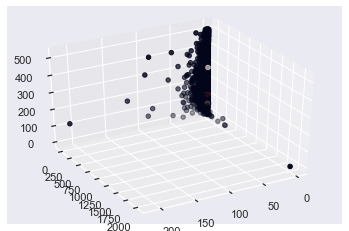

In [92]:
dbsc = DBSCAN(eps = .5, min_samples = 5).fit(db)
data_with_clusters = db.copy()
data_with_clusters['cluster_pred']=dbsc.fit_predict(data_with_clusters)
data_with_clusters
ax = sns.countplot(x="cluster_pred", data=data_with_clusters)
data_with_clusters.groupby(['cluster_pred']).count()
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=data_with_clusters['InvoiceNo']
yline=data_with_clusters['avgitems']
zline=data_with_clusters['UnitPrice']

ax.scatter3D(xline, zline,yline,c=data_with_clusters['cluster_pred'])
ax.view_init(35, 60)

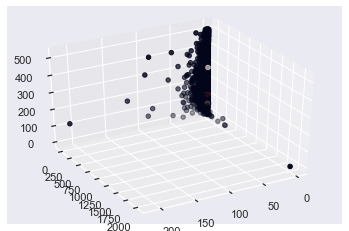

In [93]:
fig = plt.figure()
ax = plt.axes(projection='3d')
xline=data_with_clusters['InvoiceNo']
yline=data_with_clusters['avgitems']
zline=data_with_clusters['UnitPrice']

ax.scatter3D(xline, zline,yline,c=data_with_clusters['cluster_pred'])
ax.view_init(35, 60)